# CAM-UV | Comparison of HSIC and F-correlation

In [1]:
import numpy as np
import random
import lingam
from lingam.utils import print_causal_directions, print_dagc, make_dot

from IPython.display import display, Markdown

## Data generation

In [2]:
def get_noise(n):
    noise = ((np.random.rand(1, n)-0.5)*5).reshape(n)
    mean = get_random_constant(0.0,2.0)
    noise += mean
    return noise

In [3]:
def causal_func(cause):
    a = get_random_constant(-5.0,5.0)
    b = get_random_constant(-1.0,1.0)
    c = int(random.uniform(2,3))
    return ((cause+a)**(c))+b

In [4]:
def get_random_constant(s,b):
    constant = random.uniform(-1.0, 1.0)
    if constant>0:
        constant = random.uniform(s, b)
    else:
        constant = random.uniform(-b, -s)
    return constant

In [5]:
def create_data(n):
    causal_pairs = [[0,1],[0,3],[2,4]]
    intermediate_pairs = [[2,5]]
    confounder_pairs = [[3,4]]

    n_variables = 6

    data = np.zeros((n, n_variables)) # observed data
    confounders = np.zeros((n, len(confounder_pairs))) # data of unobserced common causes

    # Adding external effects
    for i in range(n_variables):
        data[:,i] = get_noise(n)
    for i in range(len(confounder_pairs)):
        confounders[:,i] = get_noise(n)
        confounders[:,i] = confounders[:,i] / np.std(confounders[:,i])

    # Adding the effects of unobserved common causes
    for i, cpair in enumerate(confounder_pairs):
        cpair = list(cpair)
        cpair.sort()
        data[:,cpair[0]] += causal_func(confounders[:,i])
        data[:,cpair[1]] += causal_func(confounders[:,i])

    for i1 in range(n_variables)[0:n_variables]:
        data[:,i1] = data[:,i1] / np.std(data[:,i1])
        for i2 in range(n_variables)[i1+1:n_variables+1]:
            # Adding direct effects between observed variables
            if [i1, i2] in causal_pairs:
                data[:,i2] += causal_func(data[:,i1])
            # Adding undirected effects between observed variables mediated through unobserved variables
            if [i1, i2] in intermediate_pairs:
                interm = causal_func(data[:,i1])+get_noise(n)
                interm = interm / np.std(interm)
                data[:,i2] += causal_func(interm)
    
    return data

Please note that the sample size set below is $n=2000$. Please reduce the sample size if the execution time is too long.

In [6]:
sample_size = 2000
X = create_data(sample_size)

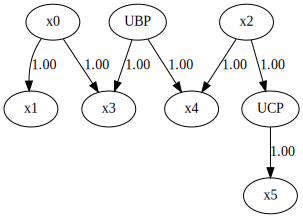

In [7]:
m = np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

make_dot(m, labels=['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'UBP', 'UCP'])

## Causal Discovery by HSIC

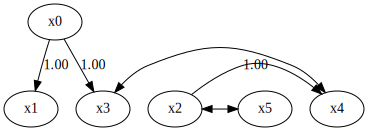

In [8]:
model = lingam.CAMUV()
model.fit(X)
dot = make_dot(model.adjacency_matrix_)
display(dot)

## Causal Discovery by F-correlation

### F-correlation threshold=0.7

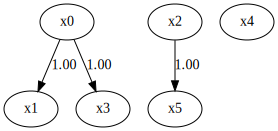

### F-correlation threshold=0.6

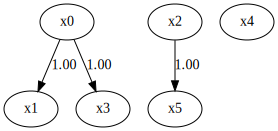

### F-correlation threshold=0.5

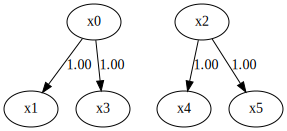

### F-correlation threshold=0.4

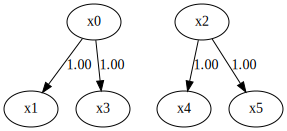

### F-correlation threshold=0.3

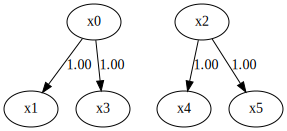

### F-correlation threshold=0.2

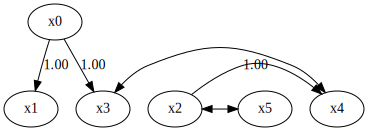

### F-correlation threshold=0.1

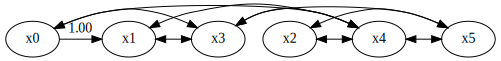

In [9]:
for ind_corr in np.linspace(0.7, 0.1, 7):
    display(Markdown(f"### F-correlation threshold={ind_corr:.1f}"))
    model = lingam.CAMUV(independence='fcorr', ind_corr=ind_corr)
    model.fit(X)
    dot = make_dot(model.adjacency_matrix_)
    display(dot)